In [1]:
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
zeo_df = pd.read_csv("data/zeolite/zeolite_data.csv")


In [3]:
zeo_df.sample(5)

,doi,doi + link,From?,article_type,journal,publisher,Si,Si_location,Ge,Ge_location,...,B,B_location,Time,Time_location,Temp,Temp_location,SDA Type,SDA Type_location,Extracted,Extracted_location
268,10.1038/nmat921,10.1038/nmat921,Text,journal_article,Nature Materials,Springer Science and Business Media LLC,1,Page Text,0.500,Page Text,...,0.0,Not Present,168,Page Text,175.00,Page Text,1-methyl-4-phenylpyridinium hydroxide,Page Text,ITQ-22,Page Text
151,10.1016/j.micromeso.2009.05.004,10.1016/j.micromeso.2009.05.004,Table,journal_article,Microporous and Mesoporous Materials,Elsevier BV,1,Table Column,0.493,Table Column,...,0.0,Not Present,120,Table Column,150.00,Page Text,"4-Methyl-2,3,6,7-tetrahydro-1H,5H-pyrido[3.2.1...",Page Text,ITQ-29+ AST,Table Column
197,10.1016/j.micromeso.2006.10.023,10.1016/j.micromeso.2006.10.023,Table,journal_article,Microporous and Mesoporous Materials,Elsevier BV,1,Table Column,0.000,Table Column,...,0.0,Not Present,504,Table Column,179.85,Table Caption,NaN,Not Present,SOD,Table Column
130,10.1016/j.jcrysgro.2009.08.031,10.1016/j.jcrysgro.2009.08.031,Table,journal_article,Journal of Crystal Growth,Elsevier BV,1,Table Column,0.000,Table Column,...,0.0,Not Present,144,Table Column,200.00,Table Column,tetramethylammonium hydroxide,Page Text,MTN+ amorphous,Table Column
3,10.1016/j.micromeso.2017.03.033,10.1016/j.micromeso.2017.03.033,Table,journal_article,Microporous and Mesoporous Materials,Elsevier BV,1,Table Column,0.050,Table Caption,...,0.0,Not Present,72,Table Column,179.85,Table Caption,hexamethonium,Page Text,ITQ-13,Table Column


In [4]:
location_columns = [column for column in zeo_df.columns if column.endswith("_location")]
print(len(location_columns))
location_columns

12


['Si_location',
 'Ge_location',
 'Al_location',
 'OH_location',
 'H2O_location',
 'HF_location',
 'SDA_location',
 'B_location',
 'Time_location',
 'Temp_location',
 'SDA Type_location',
 'Extracted_location']

In [5]:
zeo_location_counts = zeo_df[location_columns].apply(pd.Series.value_counts).fillna(0).sort_values(by=["Extracted_location", "Si_location"], ascending=True)
zeo_location_counts = zeo_location_counts.rename(columns=lambda x: x.replace("_location", ""))/len(zeo_df)
zeo_location_counts

,Si,Ge,Al,OH,H2O,HF,SDA,B,Time,Temp,SDA Type,Extracted
Footnote,0.000000,0.000000,0.000000,0.000000,0.074074,0.000000,0.000000,0.000000,0.122222,0.122222,0.029630,0.000000
Not Present,0.074074,0.003704,0.785185,0.188889,0.111111,0.237037,0.066667,0.914815,0.000000,0.000000,0.066667,0.000000
Table Caption,0.133333,0.211111,0.000000,0.133333,0.000000,0.133333,0.133333,0.000000,0.000000,0.196296,0.059259,0.000000
Table Header,0.000000,0.000000,0.000000,0.000000,0.133333,0.000000,0.000000,0.000000,0.133333,0.133333,0.122222,0.040741
Table Cell,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.133333
Page Text,0.151852,0.203704,0.085185,0.233333,0.244444,0.166667,0.314815,0.011111,0.388889,0.522222,0.722222,0.233333
Table Column,0.640741,0.581481,0.129630,0.444444,0.437037,0.462963,0.485185,0.074074,0.355556,0.025926,0.000000,0.588889


In [6]:
tab20 = matplotlib.colormaps["tab20c"]
colors = tab20.colors

location_color_map = {
    'Table Column': colors[8],
    'Table Cell': colors[9],
    'Table Header': colors[11],

    'Table Caption': colors[0],
    'Footnote': colors[1],
    'Page Text': colors[2],
    'Not Present': "grey",
}

In [8]:

zeo_location_counts

,Si,Ge,Al,OH,H2O,HF,SDA,B,Time,Temp,SDA Type,Extracted
Footnote,0.000000,0.000000,0.000000,0.000000,0.074074,0.000000,0.000000,0.000000,0.122222,0.122222,0.029630,0.000000
Not Present,0.074074,0.003704,0.785185,0.188889,0.111111,0.237037,0.066667,0.914815,0.000000,0.000000,0.066667,0.000000
Table Caption,0.133333,0.211111,0.000000,0.133333,0.000000,0.133333,0.133333,0.000000,0.000000,0.196296,0.059259,0.000000
Table Header,0.000000,0.000000,0.000000,0.000000,0.133333,0.000000,0.000000,0.000000,0.133333,0.133333,0.122222,0.040741
Table Cell,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.133333
Page Text,0.151852,0.203704,0.085185,0.233333,0.244444,0.166667,0.314815,0.011111,0.388889,0.522222,0.722222,0.233333
Table Column,0.640741,0.581481,0.129630,0.444444,0.437037,0.462963,0.485185,0.074074,0.355556,0.025926,0.000000,0.588889


Extracted
SDA Type
Temp
Time
B
SDA
HF
H2O
OH
Al
Ge
Si


/var/folders/s6/ky9bs73s61s_hmchh70d7kqh0000gn/T/ipykernel_18442/1986938990.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(list(reversed(zeo_location_counts.columns)))


[Text(0, 0.0, ''),
 Text(0, 0.2, ''),
 Text(0, 0.4, ''),
 Text(0, 0.6000000000000001, ''),
 Text(0, 0.8, ''),
 Text(0, 1.0, '')]

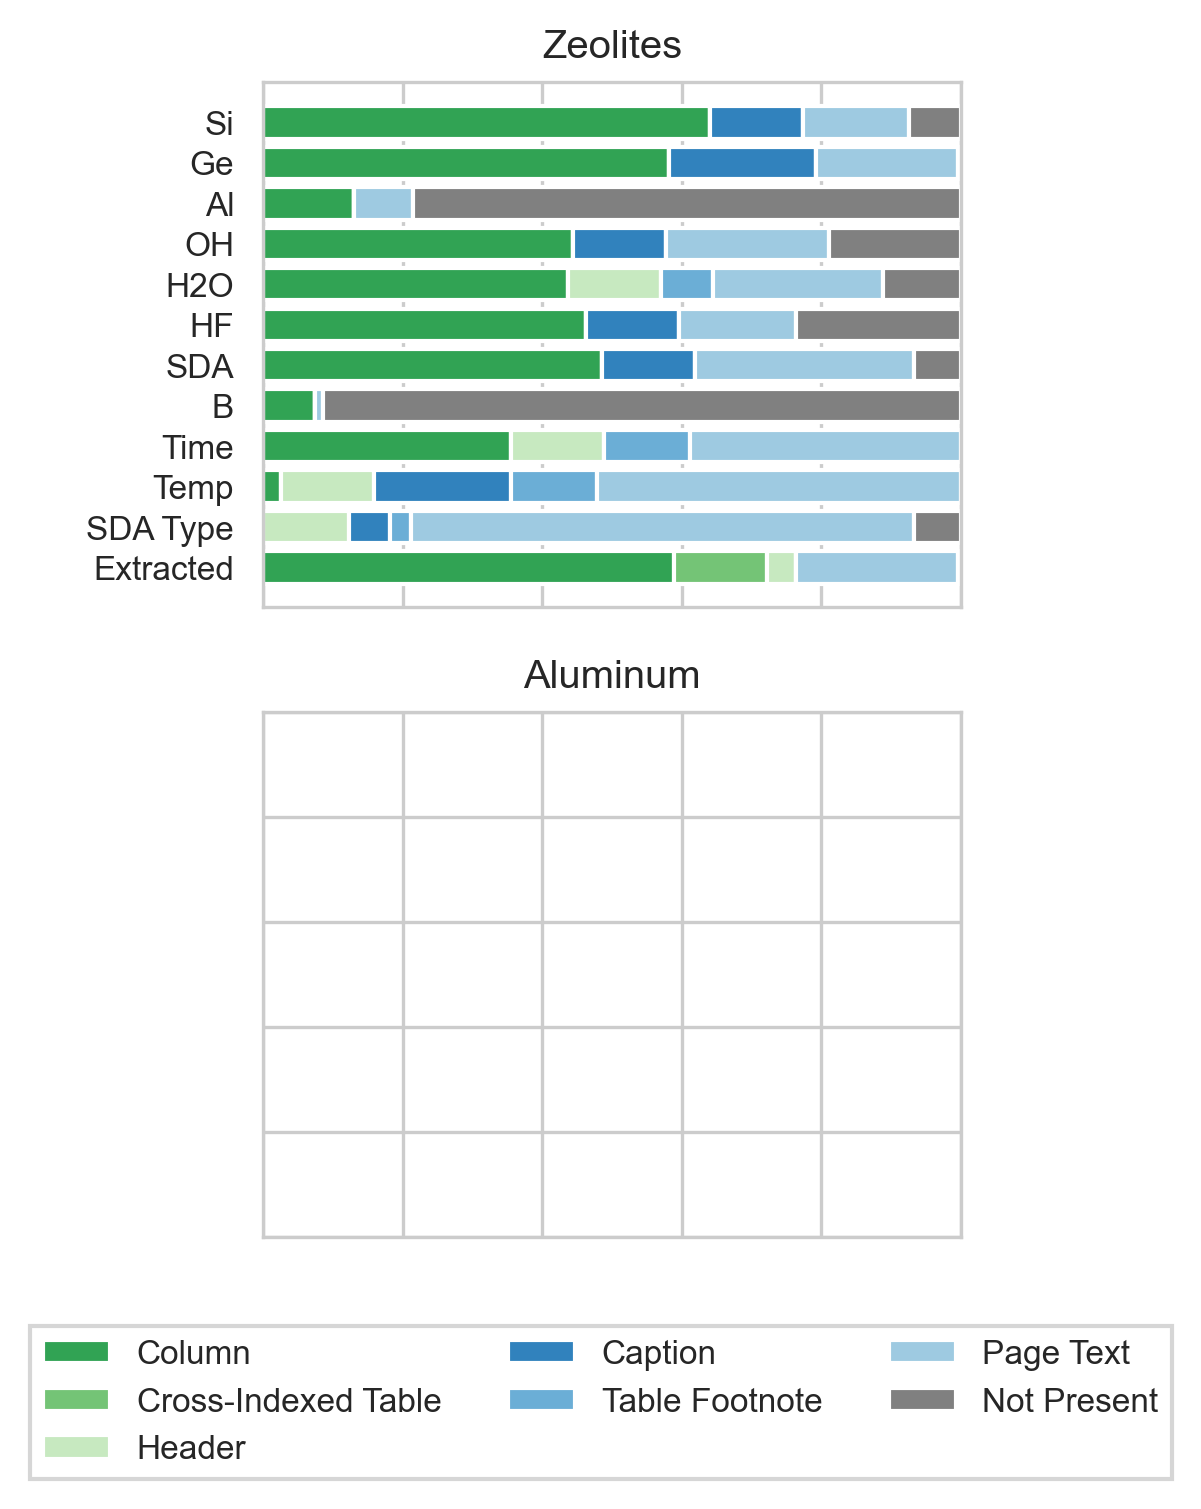

In [15]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(3, 5), dpi=300, sharex=True)

plt.rcParams.update({"font.size": 8})

display_names = {
    "Table Column": "Column",
    "Table Header": "Header",
    "Table Cell": "Cross-Indexed Table",
    "Table Caption": "Caption",
    "Footnote": "Table Footnote"
}


for i, column_name in enumerate(reversed(zeo_location_counts.columns)):
    column = zeo_location_counts[column_name]
    bottom = 0
    for location, color in location_color_map.items():
        value = column[location]
        # ax1.bar(column_name.replace("_location", ""), value, color=color, label=(display_names.get(location, location) if i == 0 else None), bottom=bottom)
        ax1.barh(column_name.replace("_location",""), value, color=color, label=display_names.get(location, location) if i == 0 else None, left=bottom)
        bottom += value


ax1.set_yticklabels(list(reversed(zeo_location_counts.columns)))
ax1.set_xticklabels([])
fig.legend(loc="center", bbox_to_anchor=(0.5, 0), fancybox=False, shadow=False, ncols=3, fontsize=8)
ax1.set_title("Zeolites")

ax2.set_title("Aluminum")
ax2.set_yticklabels([])


plt.savefig("location_distribution.png", bbox_inches='tight')